Name : 손무현
student ID : 2018-----

3. Linear Neural Networks

3.2. Linear Regression Implementation from Scratch

In [2]:
!pip install d2l==0.16.2

     |████████████████████████████████| 81kB 3.5MB/s 


In [6]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

3.2.1 Generating the Dataset

In [5]:
pwd

'/content'

In [21]:
def synthetic_data(w,b,num_examples):   # 정해준 w,b에대해서 num_examples개의 데이터를 생성하는 함수
  """Generate y = Wx + b + noise."""    #num_example개의 x와 num_example개의 y가 생성된 것임.
  X = torch.normal(0,1,(num_examples,len(w)))
  y = torch.matmul(X,w) + b
  y += torch.normal(0,0.01,y.shape)
  return X,y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w,true_b,2000) #features=인풋 labels=아웃풋 이런 것이 1000개가 생성됨

In [49]:
print('features:', features[0], '\nlabel:', labels[0])
print('features:', features[1], '\nlabel:', labels[1])
print('features:', features[2], '\nlabel:', labels[2])
print('features:', features[-1], '\nlabel:', labels[-1])

features: tensor([0.9352, 1.0717]) 
label: tensor([2.4398])
features: tensor([1.0763, 0.6171]) 
label: tensor([4.2611])
features: tensor([-0.6042,  0.2280]) 
label: tensor([2.1998])
features: tensor([-0.0509, -0.6528]) 
label: tensor([6.3355])


In [14]:
torch.matmul

<function _VariableFunctionsClass.matmul>

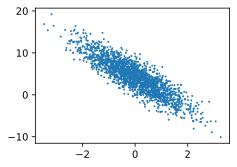

In [25]:
d2l.set_figsize()
#the semicolon is for displaying the plot only
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy(),1);

3.2.2. Reading the Dataset

In [27]:
len(features)

2000

In [29]:
def data_iter(batch_size, features, labels): # n개의 데이터를 batchsize단위로 갖고오는 함수
  num_examples = len(features)
  indices = list(range(num_examples))
  # The examples are read at random, in no particular order
  random.shuffle(indices)
  for i in range(0,num_examples,batch_size): # batchsize 단위로 끊어서loof를 돌림.
    batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
    yield features[batch_indices], labels[batch_indices]

In [31]:
batch_size = 10

for X,y in data_iter(batch_size, features, labels):
  print(X,'\n',y)
  break

tensor([[-0.6025, -0.8051],
        [ 0.5700, -0.3968],
        [ 0.1900,  0.1378],
        [-0.9476,  0.2808],
        [ 0.2128, -0.1960],
        [ 1.1572, -2.0441],
        [-0.6113, -1.3105],
        [ 1.2491, -1.1785],
        [-0.5463, -1.5000],
        [ 0.2775,  0.8921]]) 
 tensor([[ 5.7197],
        [ 6.6900],
        [ 4.1221],
        [ 1.3402],
        [ 5.2836],
        [13.4814],
        [ 7.4487],
        [10.6883],
        [ 8.2029],
        [ 1.7217]])


3.2.3. Initializing Model Parameters

In [38]:
w = torch.normal(0,0.01, size=(2,1), requires_grad=True) #w라고하는 matrix정의 평균이0이고 표준편차가 0.01인 랜덤variable생성
b = torch.zeros(1,requires_grad=True) # 0으로 정의

3.2.4. Defining the Model

In [39]:
def linreg(X,w,b):   #@save
  """ The linear regression model."""
  return torch.matmul(X,w) + b

3.2.5. Defining the Loss Function

In [40]:
def squared_loss(y_hat,y):
  """Squared loss."""
  return (y_hat - y.reshape(y_hat.shape))**2/2 #(예측값-정답)**2 / 2

3.2.6. Defining the Optimization Algorithm

In [41]:
def sgd(params,lr,batch_size):     #Stochastic Gradient Descent
  """Minibatch stochastic gradient descent."""
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad / batch_size  #(parameter = parameter - learning rate * grad) /batchsize
      param.grad.zero_()                     #위 parameter에 대한 gradient를 batchsize에 해당하는 데이터에 대해서 구한다음에그것을 batchsize로 정규화시켜줘서 러닝레이트곱해서 원래 parameter에 빼준다

3.2.7. Training

In [56]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss # 여기까지 hyperparameter들 정의함(batchsize는 위에서 정의함)

# 학습 진행
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):#우리가 만든데이터 이용해서 batchsize단위로 featuref랑 label가져옴. feature가 X로 label이 y로 들어갈거임.
     y_hat = net(X,w,b)
     l = loss(y_hat,y) #bactchsize 단위로 했으니까 batchsize개의 y_hat에 대한 lossfunction을 구하는거임
        # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
     l.sum().backward()  #여기서 sum을 한 다음에 gradient가 계산함.(mean이나 sum 둘다 상관 없는데 sum을 했기 때문에 batchsize로 나중에 나눠줄거임, 나눠주는 것은 sgd함수에 정의 해놨음)
     sgd([w, b], lr, batch_size) #여기서 parameter(w,b)가 바뀌게 됨(업데이트) # Update parameters using their gradient
    with torch.no_grad():          #이 단계에서는 parameter업데이트하지 않으니까 gradient계산하지 않는 다는 것, 계산 안하고 Loss function 구해서 epoch마다 출력해주는것.
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000052
epoch 2, loss 0.000052
epoch 3, loss 0.000051


In [45]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b:{true_b - b}')

error in estimating w: tensor([-1.8454e-04,  3.9816e-05], grad_fn=<SubBackward0>)
error in estimating b:tensor([-0.0001], grad_fn=<RsubBackward1>)


In [57]:
print(w[0],w[1],b)

tensor([2.0001], grad_fn=<SelectBackward>) tensor([-3.3999], grad_fn=<SelectBackward>) tensor([4.2001], requires_grad=True)


(2,-3.4,4.2)    w,b가 parameter로 정한 변수니까 w,b가 어떻게 변했는지

3.2 단원 실습 예제를 통해 딥러닝 모델의 전체적인 구조에 대해 알 수 있었습니다. scratch이기 때문에 직접 구현된 함수들을 접하면서 한 번에 와닿지 않았지만 반복해서 보면서 러닝과정이 어떻게 코드를 통해 이루어지는지 알게 되었습니다. 함수 중에 reshape(-1,정수)로 구성된 것이 있었는데 이것은 정수에 따라서 열의 개수가 정수이면서 element들이 빠짐 없이 배치될 수 있도록 해주는 기능을 하는 것을 알게되었습니다. 

3.3. Concise Implementation of Linear Regression

3.3.1. Generating the Dataset

In [61]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

# load examples(synthetic) ( 데이터 생성) 
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

3.3.2. Reading the Dataset

In [63]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [68]:
next(iter(data_iter)) #data loder(우리가 정한 batch단위로 입력과 label갖고옴.)

[tensor([[ 0.2357, -0.6027],
         [ 0.7321, -0.7754],
         [-0.8689, -1.6276],
         [-0.0251, -0.5926],
         [ 0.3372, -0.8326],
         [-0.7335, -0.3300],
         [ 0.4697, -0.2946],
         [-0.2894, -0.7893],
         [-0.3122,  0.9367],
         [-0.6115,  1.0320]]), tensor([[ 6.7164],
         [ 8.3034],
         [ 7.9978],
         [ 6.1708],
         [ 7.7036],
         [ 3.8623],
         [ 6.1438],
         [ 6.3060],
         [ 0.3876],
         [-0.5408]])]

3.3.3. Defining the Mode

In [64]:
# `nn` is an abbreviation for neural networks
from torch import nn

net = nn.Sequential(nn.Linear(2, 1)) #/ 2개의 숫자를 입력받아서 1개의 아웃풋을 만든 다는 것.
 # nn.Sequential()을 사용하게 되면 이 네트워크 안에 parameter가 자동으로 생성된다 (2개의 입력과 1개의 아웃풋에 대한 parameter)

3.3.4. Initializing Model Parameters

In [67]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

print(net[0].weight.data)
print(net[0].bias.data)

tensor([[0.0074, 0.0059]])
tensor([0.])


Hyperparameters

3.3.5. Defining the Loss Function

In [71]:
loss = nn.MSELoss()   #nn이 제공해주는 the mean of squared error 사용

3.3.6. Defining the Optimization Algorithm

In [72]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03) # stochastic Gradient Descent

In [73]:
num_epochs = 20

In [83]:
batch_size = 5

3.3.7. Training

In [84]:
num_epochs = 5
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000100
epoch 2, loss 0.000102
epoch 3, loss 0.000100
epoch 4, loss 0.000101
epoch 5, loss 0.000101


In [85]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([-0.0002, -0.0011])
error in estimating b: tensor([0.0009])


In [86]:
trainer.zero_grad

<bound method Optimizer.zero_grad of SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)>

In [87]:
trainer.step

<bound method SGD.step of SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)>

scratch에서는 직접 구현했던 것들이 pytorch에서 제공하는 nn이라는 라이브러리에 들어있어서 필요에 따라 가져와서 모델을 construction 할 수 있다는 것을 알게되었습니다. 이론으로 공부할 때는 전반적인 Linear Regression에 내용들이 어느 정도 이해가 되었다고 생각했지만 실습을 하면서 아직 개념적으로 머릿속에 내용들이 잘 정리되지 않았다는 것을 느끼게 되었습니다. scratch와 concise에서 실습한 내용들이 앞으로도 계속 접하게 되는 틀이기 때문에 해당 실습내용에 익숙해져야겠다는 것을 느꼈습니다.

3.6. Implementation of Softmax Regression from Scratch

In [88]:
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw




Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw




Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw




Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw

Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


3.6.1. Initializing Model Parameters

In [108]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)


3.6.2. Defining the Softmax Operation

In [109]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]), tensor([[ 6.],
         [15.]]))

In [131]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition  # The broadcasting mechanism is applied here

In [132]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.0303, 0.2401, 0.3634, 0.2269, 0.1393],
         [0.0440, 0.0873, 0.4626, 0.3809, 0.0253]]), tensor([1.0000, 1.0000]))

3.6.3. Defining the Model

In [133]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

3.6.4. Defining the Loss Function

In [113]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [114]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

3.6.5. Classification Accuracy

In [134]:
def accuracy(y_hat, y):  #@save
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [116]:
accuracy(y_hat, y) / len(y)

0.5

In [117]:
def evaluate_accuracy(net, data_iter):  #@save
    """Compute the accuracy for a model on a dataset."""
    if isinstance(net, torch.nn.Module):
        net.eval()  # Set the model to evaluation mode
    metric = Accumulator(2)  # No. of correct predictions, no. of predictions
    for X, y in data_iter:
        metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [118]:
class Accumulator:  #@save
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [119]:
evaluate_accuracy(net, test_iter)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.0556

3.6.6. Training

In [120]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """The training loop defined in Chapter 3."""
    # Set the model to training mode
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, no. of examples
    metric = Accumulator(3)
    for X, y in train_iter:   # 트레이닝 데이터 가져오는 함수
        # Compute gradients and update parameters
        y_hat = net(X)      # 모델에 넣는것(예측값을 계산하는 것)
        l = loss(y_hat, y)  # loss function 계산
        if isinstance(updater, torch.optim.Optimizer):
            # Using PyTorch in-built optimizer & loss criterion
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(float(l) * len(y), accuracy(y_hat, y), y.numel())
        else:
            # Using custom built optimizer & loss criterion
            l.sum().backward()  # gradient계산
            updater(X.shape[0]) # 계산된 것을 업데이트
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

In [121]:
class Animator:  #@save
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(self.axes[
            0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [122]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """Train a model (defined in Chapter 3)."""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [123]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

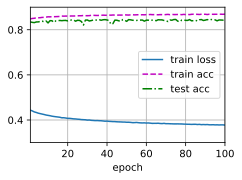

In [135]:
num_epochs = 100
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

3.6.7. Prediction

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


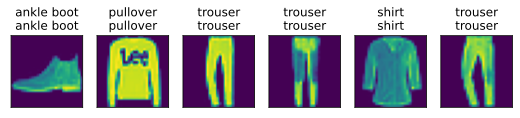

In [125]:
def predict_ch3(net, test_iter, n=6):  #@save
    """Predict labels (defined in Chapter 3)."""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

softmax Regression의 모델을 정의하고 training 하는 과정이 실제로 크게 for loop를 통해 이뤄지고 정의해준 epoch수 만큼 train_epoch_ch3로 정의한 함수를 통해 훈련이 이뤄지는 것을 알게되었습니다. 또한 training 후에 실제로 모델이 Classfication 문제를 맞추는 것을 실제로 확인해보았습니다.softmax 모델을 정의할 때 softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b) 에서 matmul에서 X의 shape을 W의 column개수와 맞춰주기 위해 (-1,W.shape)을 사용한 것을 알게 되었습니다. 이론에서 배운내용에 대해 필기한 것을 같이 보면서 실습 을 해봤는데 이해가 가지 않는 코드들이 있어서 다소 어려움이 있었지만 앞으로 sofmax Regression을 통해 classification 하는 모델을 만드는 것에 잘 활용할 수 있도록 계속 복습해야겠다고 생각했습니다.

3.7. Concise Implementation of Softmax Regression

In [157]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 300
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


3.7.1. Initializing Model Parameters

In [158]:
# PyTorch does not implicitly reshape the inputs. Thus we define the flatten
# layer to reshape the inputs before the linear layer in our network
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

3.7.2. Softmax Implementation Revisited

In [159]:
loss = nn.CrossEntropyLoss()

3.7.3. Optimization Algorithm

In [160]:
trainer = torch.optim.SGD(net.parameters(), lr=0.2)

3.7.4. Training

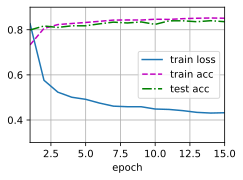

In [161]:
num_epochs = 15
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

앞서 3.3과 3.2단원에서 다뤘던 것처럼 모델을 정의하거나 training을 위한 코드를 작성하는 것에 있어서 scratch와 concise간의 편리함과 간결함의 차이를 많이 느낄 수 있었습니다.3.6단원 실습에서 epoch의 수를 10에서 100으로 증가시킨 후 실행 시켰을 때 굉장히 오랜시간이 소요된 것을 느꼈기 때문에 epoch수를 변경시킬 때 급격하게 변화된 숫자를 대입하지 않았고 learning rate와 batch사이즈 등 여러가지 hyperparameter들을 변경하여 실행시켰을때 assert error가 나는 것도 확인할 수 있었는데 train_ch3에 assert라는 명령어가 실행되어 assert train_loss < 0.5, train_loss 조건식이 True가 아니었기 때문에 더이상 프로그램이 실행되지 않고 종료된 것을 알 수 있었습니다. 만약 조건식이 True라면 다음명령어로 문제없이 진행되게 된다는 것을 알게되었습니다.